# Predicting Location via Indoor Positioning System 
## Analysis and Modeling in Python *prototypes and drabbles
This script and subsequent notebooks are the Python conversion of the Indoor Location case study from the book, 'Data Science in R' by Nolan and Lang. http://rdatasciencecases.org/code.html <BR>
* Team: Jonathan Tan, Lance Dacy, Reannan Mcdaniel, Shawn Jung 
* Last Update: 5/14/2020 

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from __future__ import print_function
#from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline 

In [101]:
# Let's load dataframes
#offline_pivot = pd.read_csv('./data/offline_pivot.csv')
#online_pivot = pd.read_csv('./data/online_pivot.csv')
offline_pivot = pd.read_csv('D:/Code/QTW Case Study 1/offline_pivot.csv')
online_pivot = pd.read_csv('D:/Code/QTW Case Study 1/online_pivot.csv')

# re-add pos_x and pos_y for distance error calculation in later stage
offline_pivot[['pos_x', 'pos_y']] = offline_pivot['pos_xy'].str.split('-',n=2, expand=True).astype(float)
online_pivot[['pos_x', 'pos_y']] = online_pivot['pos_xy'].str.split('-',n=2, expand=True).astype(float)

offline_pivot.name = 'mac'
online_pivot.name = 'mac'

<function matplotlib.pyplot.show(*args, **kw)>

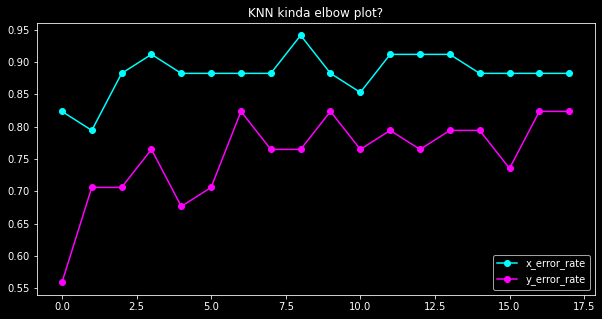

In [102]:
#elbow plot thing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
y = offline_pivot.iloc[:, 8:10] #predict on pos_x, pos_y
x = offline_pivot.iloc[:, 1:8] #mac addresses 1:7 as predictors
randstate =984
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = randstate)

error_rate = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

x_error_rate = []
y_error_rate = []

for j in range(1,len(error_rate)):
    x_error_rate.append(error_rate[j][0])
    y_error_rate.append(error_rate[j][1])

import matplotlib.pyplot as plt

plt.style.use('dark_background')
x = range(len(x_error_rate))
y = range(5)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(x, x_error_rate, linestyle = 'solid', marker = 'o', c = 'cyan', label = 'x_error_rate')
ax1.plot(x, y_error_rate, linestyle = 'solid', marker = 'o', c = 'magenta', label = 'y_error_rate')
plt.title('KNN kinda elbow plot?')
plt.legend(loc = 'lower right');

plt.show
    


Error rate is pretty high all around, with this setup at least. Looks minimal at n = 4?

In [103]:
#import time
#start_time = time.time()

#for i in [2, 3, 4, 5]:
#    knn_comparison(i)  

#print(" --- %s seconds ---" %(time.time() - start_time))

In [104]:
#knn split class prediction 
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

y = offline_pivot.iloc[:, 8] #just on pos_x 
x = offline_pivot.iloc[:, 1:8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = randstate)

knn = NearestNeighbors(n_neighbors = 4)
knn.fit(x_train)


#A = knn.kneighbors_graph(x_rain)
#A.toarray()
#need to fit some kind of metric to this

NearestNeighbors(n_neighbors=4)

In [105]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    https://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [106]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #doesn't support multi-class multi-output
from sklearn.metrics import hamming_loss #doesn't support multi-class multi-output

y = offline_pivot.iloc[:, 8:10] 
x = offline_pivot.iloc[:, 1:8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = randstate)

knn = KNeighborsClassifier(n_neighbors = 4)
classifier = MultiOutputClassifier(knn, n_jobs = -1)
classifier.fit(x_train, y_train) #fit
predictions = classifier.predict(x_test) #predict

#both to array
y_test = y_test.values #convert dataframe to array #so predictions from knn come out as array, but accuracy score doesn't support multiclass?
acc = classifier.score(x_test, y_test)
#try converting both to sparse? 
#y_test_sparse = sparse.csc_matrix(y_test) #convert y_test t0 sparse? csc
#predictions_sparse = sparse.csc_matrix(predictions) 

#try matrix conversion?
#y_test = np.matrix(y_test)
#predictions = np.matrix(predictions)

print("Accuracy = {:.2f}%".format(acc*100))
print('Hamming Score: {:.2f}%'.format(hamming_score(y_test, predictions)*100)) #Hamming score is the difference in positions?
#print('Subset Accuracy:', accuracy_score(y_test, predictions))
#print('Hamming Loss:', hamming_loss(y_test,predictions))


Accuracy = 2.94%
Hamming Score: 85.29%


<function matplotlib.pyplot.show(*args, **kw)>

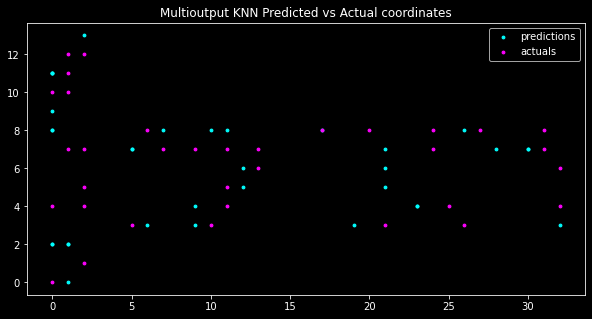

In [107]:
import matplotlib.pyplot as plt
x = range(30)
y = range(30)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(111)

predx, predy = predictions[:, 0], predictions[:, 1]
truex, truey = y_test[:, 0], y_test[:, 1]

ax1.scatter(predx, predy, s = 8, c = 'cyan', label = 'predictions')
ax1.scatter(truex, truey, s = 8, c = 'magenta', label = 'actuals')
plt.title('Multioutput KNN Predicted vs Actual coordinates')
plt.legend(loc = 'upper right');

plt.show

In [108]:
#BinaryRelevance Gaussian Naive Bayes classifier
from skmultilearn.problem_transform import BinaryRelevance

y = offline_pivot.iloc[:, 8:10] 
x = offline_pivot.iloc[:, 1:8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = randstate)
classifier = BinaryRelevance(GaussianNB()) #binary relevance multiclassifier
classifier.fit(x_train, y_train) #fit
predictions = classifier.predict(x_test) #predict
y_test = y_test.values #convert dataframe to array 
predictions = predictions.toarray()

#acc = classifier.score(x_test, y_test) #accuracy doesn't seem to work? change datatypes later
#print("Accuracy = {:.2f}%".format(acc*100))
print('Hamming Score: {:.2f}%'.format(hamming_score(y_test, predictions)*100))

Hamming Score: 89.71%


<function matplotlib.pyplot.show(*args, **kw)>

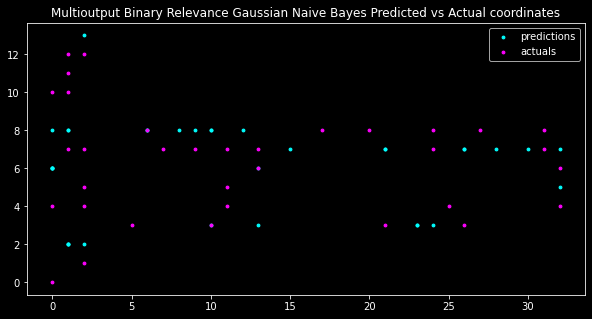

In [109]:
x = range(30)
y = range(30)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(111)

predx, predy = predictions[:, 0], predictions[:, 1]
truex, truey = y_test[:, 0], y_test[:, 1]

ax1.scatter(predx, predy, s = 8, c = 'cyan', label = 'predictions')
ax1.scatter(truex, truey, s = 8, c = 'magenta', label = 'actuals')
plt.title('Multioutput Binary Relevance Gaussian Naive Bayes Predicted vs Actual coordinates')
plt.legend(loc = 'upper right');

plt.show

Hamming Distance Example

karolin

kathrin

  |||      Different at 3 positions so a distance of 3

1011101

1001001

  | |      Distance of 2

2173896

2233796

 || |      Distance of 3


how to reconcile accuracy with hamming score? how to get accuracy out of multiclass/multilabel output?

In [110]:
#RF test
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#single class prediction on pos_x, then pos_y??
y = offline_pivot.iloc[:, 8] 
x = offline_pivot.iloc[:, 1:8]

cv = StratifiedKFold(n_splits = 10)
#significant of n_estimators? number of trees?
clf = RandomForestClassifier(n_estimators= 100, random_state = randstate)
acc = cross_val_score(clf, x, y = y, cv = cv)

print("average Accuracy For pos_X= ", acc.mean()*100, "+/-", acc.std()*100)
#confusion matrix for mean accuracy?

y = offline_pivot.iloc[:, 9] #for pos_y
x = offline_pivot.iloc[:, 1:8]

cv = StratifiedKFold(n_splits = 10)

clf = RandomForestClassifier(n_estimators= 100, random_state = 1)
acc = cross_val_score(clf, x, y = y, cv = cv)

print("average Accuracy For pos_Y= ", acc.mean()*100, "+/-", acc.std()*100)
#hmm not great, 22% acc for x, 44% acc for y for Random Forest Classifier with 100 "branches" and 10 splits

average Accuracy For pos_X=  20.514705882352942 +/- 10.250432516826152
average Accuracy For pos_Y=  44.338235294117645 +/- 16.601371519611863


In [111]:
#kmeans
from sklearn.cluster import KMeans
import numpy as np

x2 = offline_pivot.iloc[:, 1:8] #fit kmeans to predictors, 7 macs
y2 =offline_pivot.iloc[:, 9:10]

cls = KMeans(n_clusters = 7, init = 'k-means++', random_state = randstate)
cls.fit(x2)
newfeature = cls.labels_

X = offline_pivot.iloc[:, 1:8]
X = np.column_stack((X,pd.get_dummies(newfeature))) #use for comparison with acc cross val

acc = cross_val_score(clf, X, y = y2, cv = cv)
print('KMeans Pos_X accuracy  = {:.2f}%'.format(acc[0]*100))
print('KMeans Pos_Y accuracy  = {:.2f}%'.format(acc[1]*100))
#not much better than random forest

KMeans Pos_X accuracy  = 35.29%
KMeans Pos_Y accuracy  = 52.94%


In [112]:
offline_pivot.head() #retool singular knn model to exclude c0 mac? ideally have a function to call that would save space on all this... 

,pos_xy,00:0f:a3:39:dd:cd,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90,pos_x,pos_y
0,0.0-0.0,-71.733746,-52.359281,-66.370130,-63.195572,-35.571906,-64.322957,-55.359862,0.0,0.0
1,0.0-1.0,-70.485893,-52.981818,-65.358804,-63.697417,-39.261589,-65.441860,-59.109589,0.0,1.0
2,0.0-10.0,-70.194268,-56.337386,-65.612903,-69.237354,-44.705298,-66.894958,-50.376307,0.0,10.0
3,0.0-11.0,-70.314607,-54.726444,-67.107914,-70.307407,-48.366782,-66.747082,-54.931507,0.0,11.0
4,0.0-12.0,-68.763158,-56.030303,-70.422383,-72.344203,-44.881757,-66.707317,-50.486207,0.0,12.0


### Online Data Tests

In [154]:
def proper_round(num, dec=0):
    num = str(num)[:str(num).index('.')+dec+2]
    if num[-1]>='5':
        return float(num[:-2-(not dec)]+str(int(num[-2-(not dec)])+1))
    return float(num[:-1])

In [252]:
#online data knn 
y = online_pivot.iloc[:, 8:10] #online y values are not whole numbers, raising continous multioutput incompatibility
x = online_pivot.iloc[:, 1:8]

online_pivot_rounded_x = online_pivot.iloc[:, 8].apply(float) #round everything off?? This kind of loses the point of the online data though, as real world RLTS won't have points recorded at nice round intervals
online_pivot_rounded_y = online_pivot.iloc[:, 9].apply(float) 
online_pivot_rounded_x = online_pivot_rounded_x.apply(proper_round) 
online_pivot_rounded_y = online_pivot_rounded_y.apply(proper_round)
frame = {'pos_x': online_pivot_rounded_x, 'pos_y': online_pivot_rounded_y}
y2 = pd.DataFrame(frame)

y3x = online_pivot.iloc[:, 8].apply(str)
y3y = online_pivot.iloc[:, 9].apply(str)
y3 = pd.DataFrame({'pos_x':y3x, 'pos_y':y3y})

x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size = .4, random_state = randstate)
#y_test2 = pd.DataFrame({'pos_x':y_test[:, 0], 'pos_y':y_test[:, 1]}) #convert y_test to dataframe???
knn = KNeighborsClassifier(n_neighbors = 4)
classifier = MultiOutputClassifier(knn, n_jobs = -1)
classifier.fit(x_train, y_train) #fit
predictions = classifier.predict(x_test) #predict

y_test = y_test.values 
acc = classifier.score(x_test, y_test)


print("Accuracy = {:.2f}%".format(acc*100))
print('Hamming Score: {:.2f}%'.format(hamming_score(y_test, predictions)*100)) #Hamming score is the difference in positions?
#print('Subset Accuracy:', accuracy_score(y_test, predictions))
#print('Hamming Loss:', hamming_loss(y_test,predictions))

#yikes!

Accuracy = 4.17%
Hamming Score: 87.50%


<function matplotlib.pyplot.show(*args, **kw)>

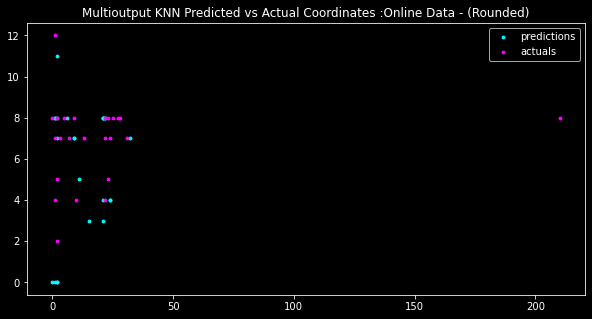

In [248]:
x = range(30)
y = range(30)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(111)

predx, predy = predictions[:, 0], predictions[:, 1]
truex, truey = y_test[:, 0], y_test[:, 1]

ax1.scatter(predx, predy, s = 8, c = 'cyan', label = 'predictions')
ax1.scatter(truex, truey, s = 8, c = 'magenta', label = 'actuals')
plt.title('Multioutput KNN Predicted vs Actual Coordinates :Online Data - (Rounded)')
plt.legend(loc = 'upper right');

plt.show

In [123]:
all_angles = np.round(np.linspace(0,405,10),1)
angles=[]
for i in range(len(all_angles)-2):
    angle = all_angles[i:i+3]
    angle = np.where(angle >= 360, angle-360, angle)
    angles.append(angle)

In [124]:
# Let's define a train data selector, by giving three different angle ranges 
def train_select(train_full_df, angles=[0.0, 90.0, 135.0]):
    train_pivot = train_full_df[train_full_df['orientation'].isin(angles)].reset_index(drop=True)
    train_pivot['pos_xy'] = train_pivot[['pos_x', 'pos_y']].astype(str).agg('-'.join, axis=1)
    train_pivot = pd.pivot_table(train_pivot, values='signal', index='pos_xy', columns='mac', aggfunc=np.mean).reset_index()
    train_pivot[['pos_x', 'pos_y']] = train_pivot['pos_xy'].str.split('-',n=2, expand=True).astype(float)

    return train_pivot


In [125]:
offline = pd.read_csv('D:/Code/QTW Case Study 1/offline_processed2.csv')

In [126]:
offline_pivot2 = train_select(offline, angles=all_angles[0:3])

In [127]:
# define kfold splits over offline data. We adopt 10 CV splits 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=42)

In [128]:
# The function returns top k nearest neighbors  
def find_NN(test_array, train_df, k=1, distance_type=distance.cityblock):
    dist = []
    for i in range(train_df.shape[0]):
        #d = np.sqrt(np.sum(np.square((np.array(test_array) - np.array(train_df)[i]))))
        d = distance_type(test_array, np.array(train_df)[i])
        dist.append(d)
    
    dist_result = np.array(dist)
    
    # return the indices of top n lowest values

    return dist_result.argsort()[0:k][::-1]


In [129]:
from scipy.spatial import distance

def location_scoring(test_df, train_df, k=1, distance_type=distance.cityblock, weighted_mean=True):
    errors = []
    for i in range(test_df.shape[0]):
        predicted_nn = find_NN(test_df.iloc[i], train_df, k, distance_type)
        error = error_calc(i, predicted_nn, weighted_mean, distance_type)
        errors.append(error)
    
    return np.mean(errors)


In [130]:
# The function calculates weighted or simple averaged predicted location, and compare to the actual location. And then return the gap as error 
def error_calc(original_index, predict_index, weighted_mean=True, distance_type=distance.cityblock):
    original_xy = online_pivot.iloc[original_index][['pos_x', 'pos_y']]
    dist = []
    pred_xy = np.zeros([len(predict_index),2])
    for i,p in enumerate(predict_index):
        xy = offline_pivot.iloc[p][['pos_x', 'pos_y']]
        dist.append(1/distance_type(original_xy, xy)) #weighted sum by 1/dist
        pred_xy[i] = xy
    # in case we use weighted mean, 
    if weighted_mean:
        avg_pred_x = np.average(pred_xy[:,0], weights=dist)
        avg_pred_y = np.average(pred_xy[:,1], weights=dist)
    else:
        avg_pred_x = np.average(pred_xy[:,0])
        avg_pred_y = np.average(pred_xy[:,1])

    error = distance_type(original_xy, (avg_pred_x, avg_pred_y))
    return(error)


In [131]:
# Sanity test before running Grid Search!
score = location_scoring(online_pivot.iloc[:,1:8], offline_pivot.iloc[:,1:8], k=1, distance_type=distance.cityblock, weighted_mean=True)
print(score)

2.8374999999999995


In [132]:
k_space = [1,2,3,4,5,6,7,8,9,10]
mean_errors = []
weighted_means = [True, False]

for angle in angles:
    # select offline data with angle ranges, and remove the MAC address C0. 
    offline_df = train_select(offline, angles=angle)
    offline_df = offline_df.iloc[:,1:8].drop(['00:0f:a3:39:e1:c0'], axis=1)
    
    # apply cv split 
    kf.get_n_splits(offline_df)
    for mean_method in weighted_means:
        for k in k_space:
            scores = []
            for train_index, test_index in kf.split(offline_df):
                scores.append(location_scoring(offline_df.iloc[test_index], offline_df.iloc[train_index], k=k, weighted_mean=mean_method))

            mean_error = np.mean(scores)
            mean_errors.append(mean_error)
            #print(f'weighted_mean={mean_method}, k = {k} , mean error = {mean_error:.4f}')



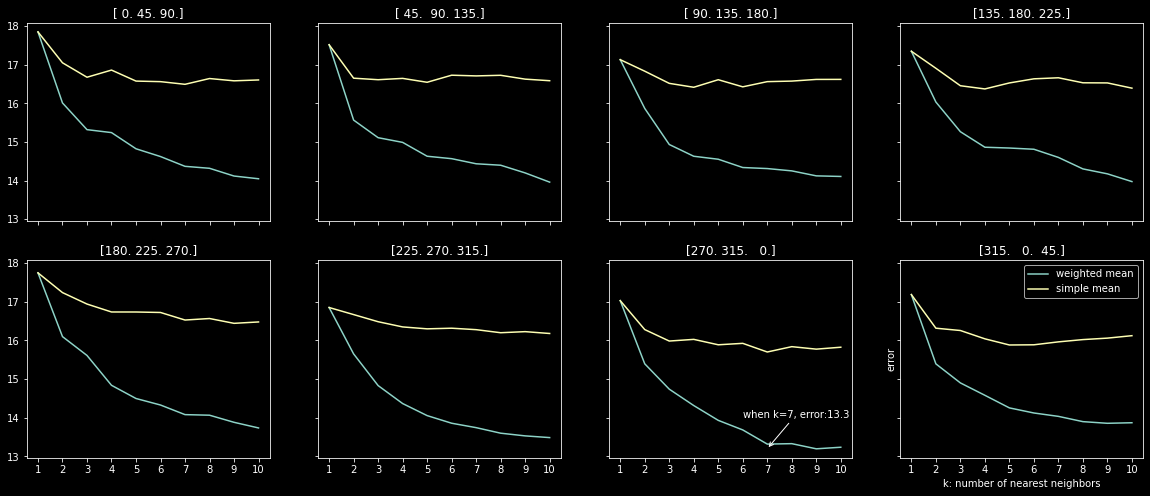

In [133]:
# It appears that we get good 'elbow' value at angles [270, 315, 0] and k=7

fig, axs = plt.subplots(2,4, sharex=True, sharey=True, figsize=(20,8))

for k,v in enumerate(np.linspace(0,140,8, dtype=int)):
    
    axs.flatten()[k].plot(k_space, mean_errors[v:v+10], label='weighted mean')
    axs.flatten()[k].plot(k_space, mean_errors[v+10:v+20], label='simple mean')
    axs.flatten()[k].set_title(str(angles[k]))
    

plt.xticks(k_space)
axs.flatten()[6].annotate('when k=7, error:' + str(np.round(mean_errors[126],1)), xy=(7,13.2), xytext=(6,14), arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.xlabel('k: number of nearest neighbors')
plt.ylabel('error')
plt.legend()
plt.show()

In [249]:
# So let's apply the angle to select the final train data set
offline_pivot = train_select(offline, angles=[270., 315., 0.])

In [250]:
# Let's define 6 MAC addresses, by choosing the one end with 'CD'. 
offline_cd = offline_pivot.iloc[:,1:8].drop(['00:0f:a3:39:e1:c0'], axis=1)
online_cd = online_pivot.iloc[:,1:8].drop(['00:0f:a3:39:e1:c0'], axis=1)

# These are data sets when choosing 'C0'
offline_c0 = offline_pivot.iloc[:,1:8].drop(['00:0f:a3:39:dd:cd'], axis=1)
online_c0 = online_pivot.iloc[:,1:8].drop(['00:0f:a3:39:dd:cd'], axis=1)

# Datasets when we take all 7 MAC addresses
offline_all = offline_pivot.iloc[:,1:8]
online_all = online_pivot.iloc[:,1:8]

In [251]:
scores_c0 = location_scoring(online_c0, offline_c0, k=7, weighted_mean=True)
scores_cd = location_scoring(online_cd, offline_cd, k=7, weighted_mean=True)
scores_all = location_scoring(online_all, offline_all, k=7, weighted_mean=True)

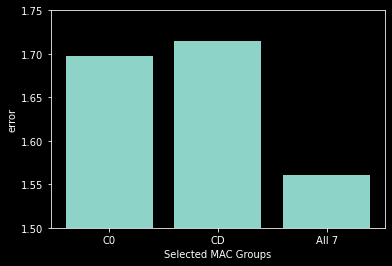

In [137]:
plt.bar(['C0', 'CD', 'All 7'], [scores_c0, scores_cd, scores_all])
plt.ylim([1.5, 1.75])
plt.xlabel('Selected MAC Groups')
plt.ylabel('error')
plt.show()

In [138]:
scores_all

1.5611929801663664

In [139]:
#try to pull out some sort of visualization data????